In [1]:
import pandas as pd
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month']=pd.to_datetime(data['Month'])

In [5]:
data['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [6]:
data["Mon"]=pd.to_datetime(data["Month"]).dt.month
data["Year"]=pd.to_datetime(data["Month"]).dt.year
data

,Month,#Passengers,Mon,Year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


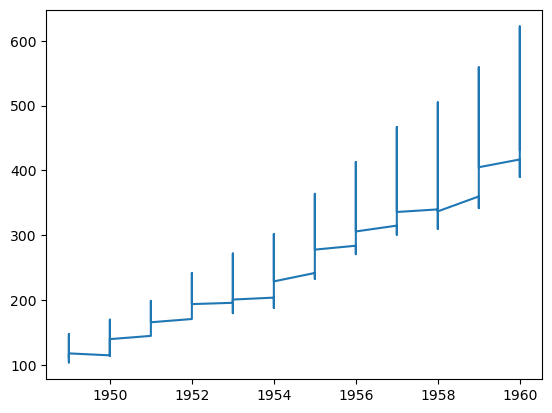

In [7]:
import matplotlib.pyplot as plt

plt.plot(data['Year'],data["#Passengers"])

In [8]:
years=list(data["Year"].unique())
months=list(data["Mon"].unique())
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


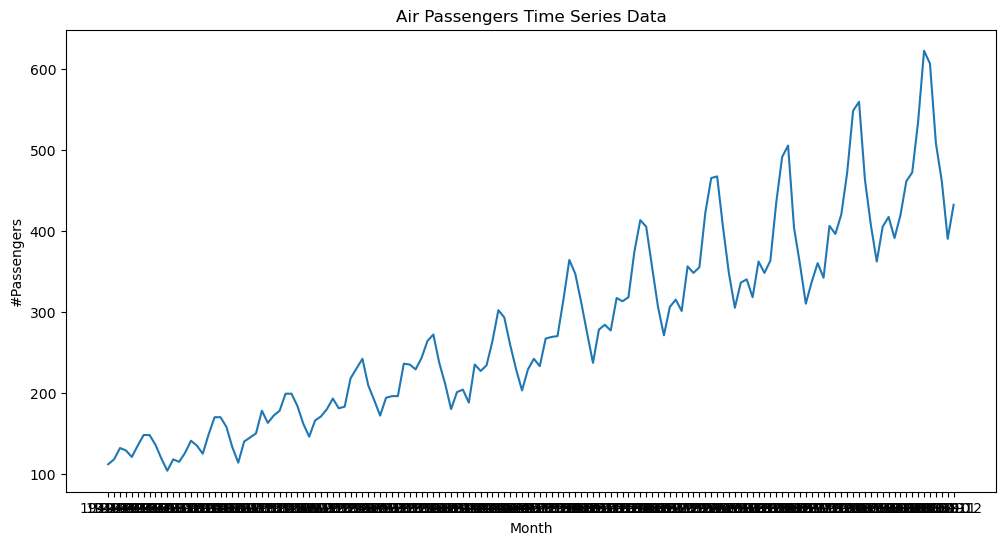

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
ADF Statistic (After Differencing): -2.8292668241699874
p-value (After Differencing): 0.05421329028382711


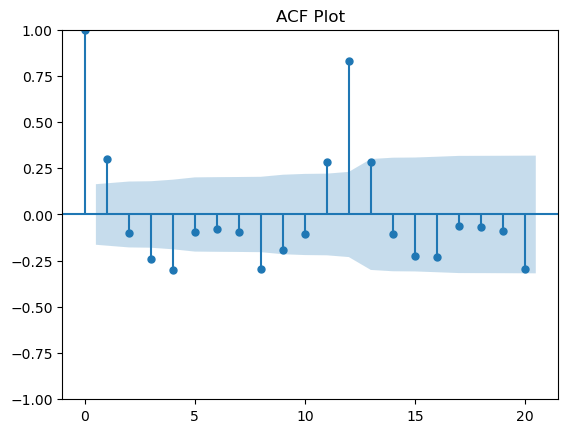

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


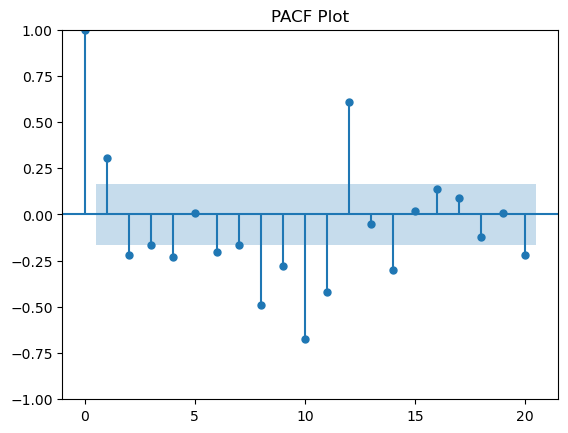

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Load the dataset
df = pd.read_csv("AirPassengers.csv")

# Check the first few rows of the dataset
print(df.head())

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'])
plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.title("Air Passengers Time Series Data")
plt.show()



# Check for stationarity
result = adfuller(df['#Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])



# Differencing to make data stationary
df['Passengers_diff'] = df['#Passengers'] - df['#Passengers'].shift(1)
df = df.dropna()

# Check for stationarity after differencing
result = adfuller(df['Passengers_diff'])
print("ADF Statistic (After Differencing):", result[0])
print("p-value (After Differencing):", result[1])

# ACF and PACF plots
plot_acf(df['Passengers_diff'], lags=20)
plt.title("ACF Plot")
plt.show()

plot_pacf(df['Passengers_diff'], lags=20)
plt.title("PACF Plot")
plt.show()


# Create and fit the ARIMA model
p, d, q = 1, 1, 1  # Example values, choose based on ACF and PACF plots
model = ARIMA(df['#Passengers'], order=(p, d, q))
model_fit = model.fit(disp=0)

# Make predictions
predictions = model_fit.predict(start=len(df), end=len(df) + 11, typ='levels')

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], label='Observed')
plt.plot(pd.date_range(start=df['Month'].iloc[-1], periods=13, freq='M'), predictions, label='Predicted', color='red')
plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.title("Air Passengers Time Series Forecast")
plt.legend()
plt.show()
